#**Week 14 - Case study on Unsupervised Learning**

> _Do the following in the wine dataset:_

1. **Read the dataset to the python environment.**
2. **Try out different clustering models in the wine dataset.**
3. **Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.**

##**1. Read the dataset to the python environment**

######***Importing necessary libraries***

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


######***Reading dataset Wine.csv in to Python Environment using read_csv(). The first 5 observations are displayed.***

In [69]:
df=pd.read_csv('/content/gdrive/MyDrive/ICTAK/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


######***Displaying the last 5 observations***

In [70]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


######***Identifying the basic details of the dataset***

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [72]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


######***Finding the no: of Observations***

In [73]:
df.shape

(178, 13)

######***Checking for null values***

In [74]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


##**Insights:**


*   The wine dataset contains the results of a chemical analysis of wines: 
    *   _**Alcohol** - Amount of Alcohol present in that particular wine type_  
    *   _**Malic_Acid** - Amount of Malic Acid present_ 
    *   _**Ash** - Amount of Ash present_
    *   _**Ash_Alcanity** - Amount of Alcalinity of Ash present_
    *   _**Magnesium** - Amount of Magnesium present_
    *   _**Total_Phenols** - Amount of phenol present_
    *   _**Flavanoids** - Amount of Flavanoids present_
    *   _**Nonflavanoid_Phenols** - Amount of Nonflavanoid phenols present_
    *   _**Proanthocyanins** - Amount of Proanthocyanins present_
    *   _**Color_Intensity** - Amount of Color intensity present_
    *   _**Hue** - Amount of Hue present_
    *   _**OD280** - OD280/OD315 of diluted wines_
    *   _**Proline** - Amount of Proline present_
        
*   **178 Observations** and **13 Features** are found.
*   **No Null** values found.
*  The **datatype** for the features:      
      *   _**Alcohol, Malic_Acid, Ash, Ash_Alcanity, Total_Phenols, Flavanoids, Nonflavanoid_Phenols, Proanthocyanins, Color_Intensity, Hue, OD280** - are given as Float with 64-bits_
      *   _**Magnesium, Proline** - are given as Integers with 64-bits_
* Our aim to find out the target - Wine Type/Class, which is missing in this particular dataset





######***Checking for Outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

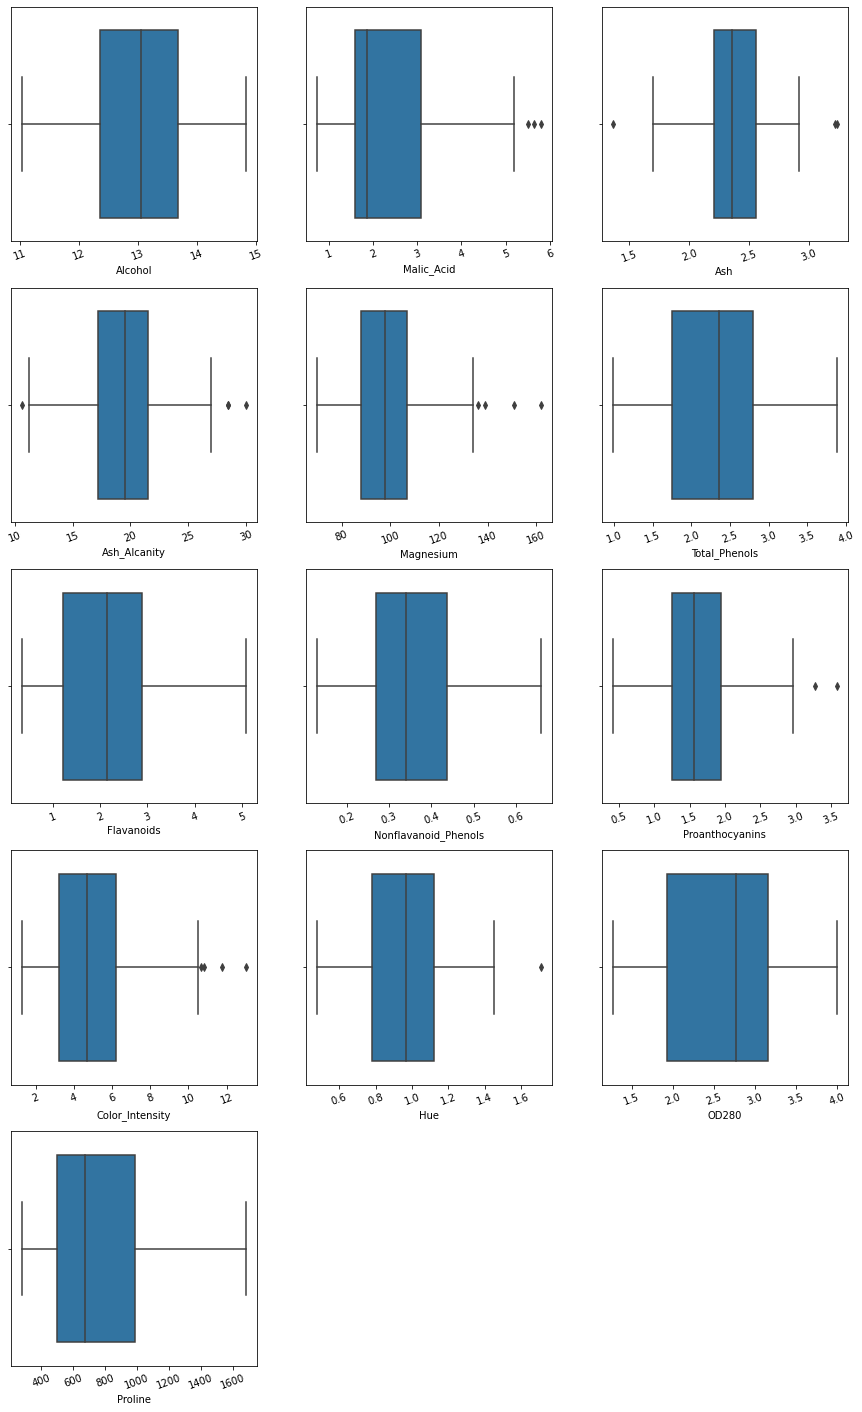

In [75]:
plt.figure(figsize=(15,25))
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in enumerate(features): 
    ax = plt.subplot(5, 3, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)    

######***Handling Outliers for the features - Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity, Hue***

In [76]:
for i in ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity', 'Hue']:
  Q1=np.percentile(df[i],25,interpolation='midpoint')
  Q2=np.percentile(df[i],50,interpolation='midpoint')
  Q3=np.percentile(df[i],75,interpolation='midpoint')
  IQR=Q3-Q1
  low_limit=Q1-1.5*IQR
  up_limit=Q3+1.5*IQR  
  df.loc[df[i]<low_limit, i] = low_limit
  df.loc[df[i]>up_limit, i] = up_limit

######***Checking whether all Outliers are removed or not***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

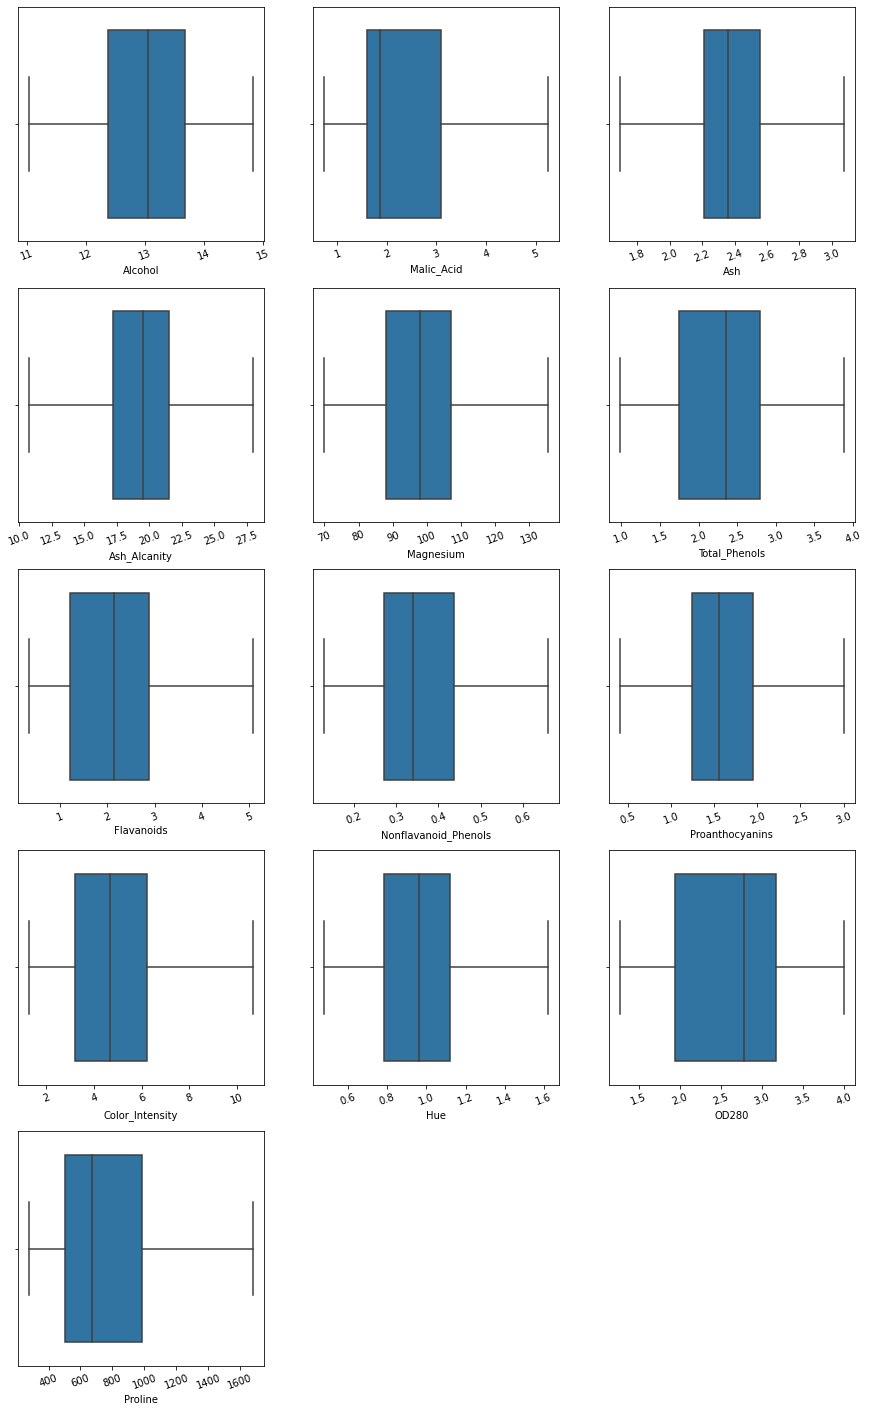

In [77]:
plt.figure(figsize=(15,25))
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in enumerate(features): 
    ax = plt.subplot(5, 3, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)  

######***Scaling Data using Standard Scaler***

In [78]:
df1 = df.copy(deep=True)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

######***Finding Correlation using corr() and Plotting a heatmap***

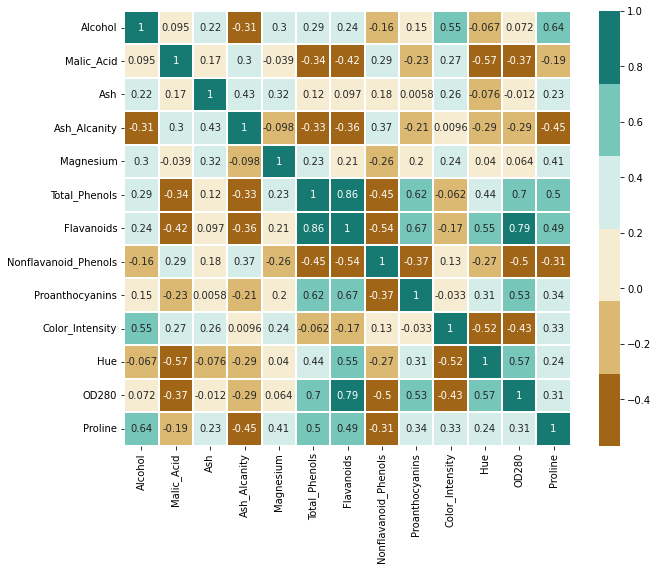

In [79]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,8))
colormap = sns.color_palette("BrBG")
sns.heatmap(corrmatrix, annot=True, linewidth=1, cmap=colormap)

##**2. Try out different clustering models in the wine dataset**


_The 2 different clustering models are:_

  1. K-means Clustering
  2. Agglomerative Hierarchical Clustering

###***2.1. K-means Clustering***

In [80]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

###***2.2. Agglomerative Hierarchical Clustering***

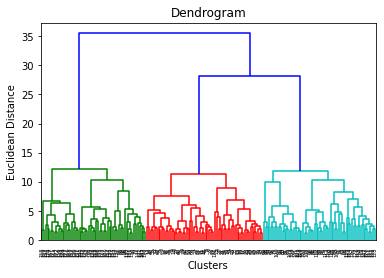

In [81]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

##**3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters**

_The 2 different ways to find the optimum number of clusters are:_

  1. The Elbow Method
  2. The Dendrogram Method

###***3.1.1. Optimum number of Clusters using Elbow Method***

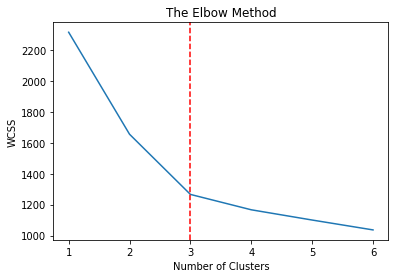

In [82]:
plt.plot(range(1,7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=3, color='r', linestyle='--')
plt.show()

##**Insights**:
_The number of clusters as per the Elbow Method is: 3_

###***3.1.2. Creating the model with the optimum number of clusters***

In [83]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(df1)

In [84]:
df2 = pd.concat([df, pd.Series(y_kmeans)], axis = 1)
df2.columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'clusters']
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


###***3.1.3. Scatter Plotting***

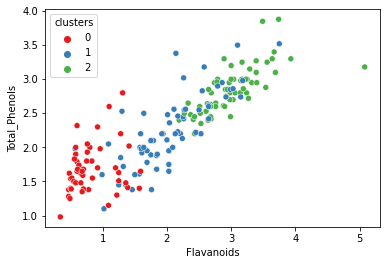

In [85]:
sns.scatterplot(x = 'Flavanoids', y = 'Total_Phenols', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

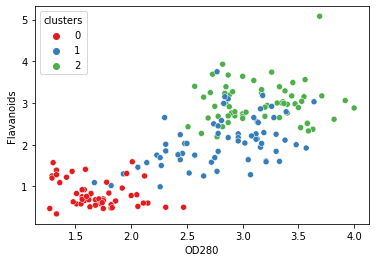

In [86]:
sns.scatterplot(x = 'OD280', y = 'Flavanoids', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

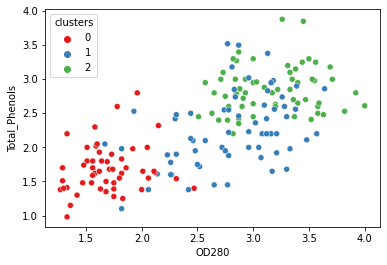

In [87]:
sns.scatterplot(x = 'OD280', y = 'Total_Phenols', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

###***3.1.4. Pie Chart***

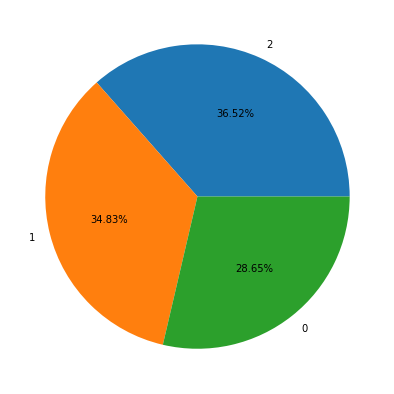

In [88]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df2['clusters'].value_counts().to_list(), labels = list(df2['clusters'].unique()),autopct='%1.2f%%')
plt.show()

##**Insights**:
_Most of the observations belongs to Cluster no:2_

###***3.2.1. Optimum number of Clusters using Dendrogram Method***

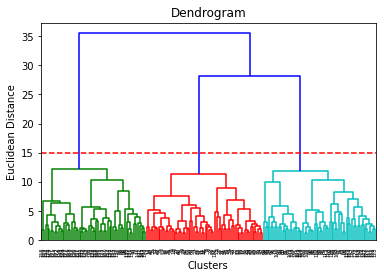

In [89]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

##**Insights**:
_The number of clusters as per the Dendrogram Method is: 3_

###***3.2.2. Creating the model with the optimum number of clusters***

In [90]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(df1)

In [91]:
df2 = pd.concat([df, pd.Series(y_hc)], axis = 1)
df2.columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'clusters']
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


###***3.2.3. Scatter Plotting***

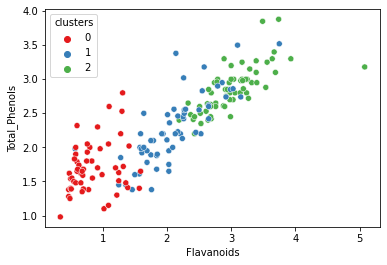

In [92]:
sns.scatterplot(x = 'Flavanoids', y = 'Total_Phenols', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

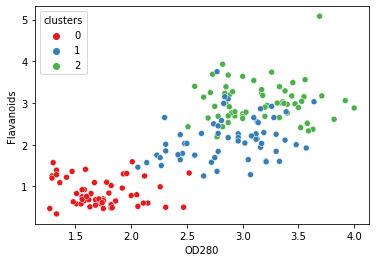

In [93]:
sns.scatterplot(x = 'OD280', y = 'Flavanoids', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

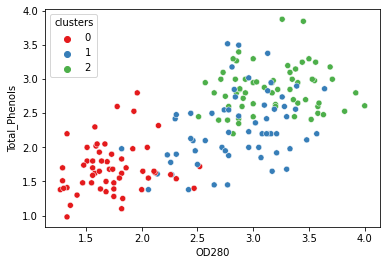

In [94]:
sns.scatterplot(x = 'OD280', y = 'Total_Phenols', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

###***3.1.4. Pie Chart***

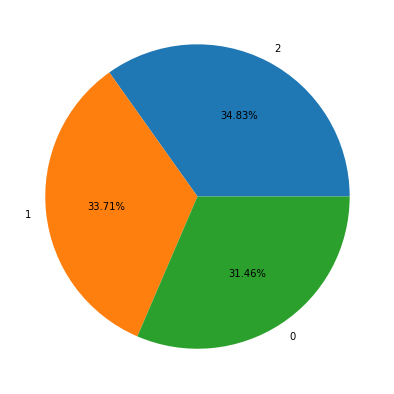

In [95]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df2['clusters'].value_counts().to_list(), labels = list(df2['clusters'].unique()),autopct='%1.2f%%')
plt.show()

##**Insights**:
_Most of the observations belongs to Cluster no:2_

##**Checking the Efficiency of the Models**

######***Silhouette Analysis for K-Means***

In [96]:
from sklearn.metrics import silhouette_score
for i in range(2,10):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)  
  y_kmeans=kmeans.fit_predict(df1)  
  score = silhouette_score(df1, y_kmeans)
  print("For n_clusters = {}, silhouette score is {})".format(i, score))

For n_clusters = 2, silhouette score is 0.2683377345519036)
For n_clusters = 3, silhouette score is 0.28550310855094574)
For n_clusters = 4, silhouette score is 0.25239307840514164)
For n_clusters = 5, silhouette score is 0.2031502693696948)
For n_clusters = 6, silhouette score is 0.18575652387885827)
For n_clusters = 7, silhouette score is 0.1886972554133238)
For n_clusters = 8, silhouette score is 0.14105972659046093)
For n_clusters = 9, silhouette score is 0.13652293114546235)


######***Silhouette Analysis for Agglomerative Hierarchical Clustering***

In [97]:
for i in range(2,10):
  hc=AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
  y_hc=hc.fit_predict(df1)   
  score = silhouette_score(df1, y_hc)
  print("For n_clusters = {}, silhouette score is {})".format(i, score))

For n_clusters = 2, silhouette score is 0.26763094828095596)
For n_clusters = 3, silhouette score is 0.27872059778855557)
For n_clusters = 4, silhouette score is 0.21719811397635744)
For n_clusters = 5, silhouette score is 0.1854240722094802)
For n_clusters = 6, silhouette score is 0.12390225715261326)
For n_clusters = 7, silhouette score is 0.12535341903795122)
For n_clusters = 8, silhouette score is 0.12783321145619514)
For n_clusters = 9, silhouette score is 0.13657323054860274)


##**Insights**:
_The Silhouette Analysis for both K-Means and Agglomerative Hierarchical Clustering shows that,_

* The Clusters are overlapping
* The analysis gives best score, when the number of clusters is 3
* Let us conclude that, the dataset contains **3 Wine Types**.